In [ ]:
import pandas as pd
import json
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import BertTokenizer
import transformers
from transformers import AutoModel, BertTokenizerFast
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
data = df= pd.read_csv('/content/drive/MyDrive/Only Others/others_df.csv').drop(columns=['Unnamed: 0'])

In [ ]:
data.head()

,_id,org_code,clean_text,cleaned_grievance,text_topic_modeling,cleaned_lemma,grievances,grievance_length
0,GOVTG/E/2023/0000001,GOVTG,My INDIAN Passport number: X7X3X4X0 My Imm...,My INDIAN Passport number My Immigration Newze...,INDIAN Passport number Immigration Newzealand ...,INDIAN Passport number Immigration Newzealand ...,My INDIAN Passport number My Immigration Newze...,806
1,GOVTG/E/2023/0000002,GOVTG,. My INDIAN Passport number: X7X3X4X0 My ...,My INDIAN Passport number My Immigration Newze...,INDIAN Passport number Immigration Newzealand ...,INDIAN Passport number Immigration Newzealand ...,My INDIAN Passport number My Immigration Newze...,806
2,GOVTG/E/2023/0000004,GOVTG,My father was a retired Railway police worked ...,My father was a retired Railway police worked ...,father retired Railway police worked head cons...,father retire Railway police work head constab...,My father was a retired Railway police worked ...,557
3,GOVTG/E/2023/0000005,GOVTG,Dear CM Sir - Bhadrachalam is a wonderful pilg...,Dear CM Sir Bhadrachalam is a wonderful pilgri...,Dear CM Sir Bhadrachalam wonderful pilgrim cen...,dear CM Sir Bhadrachalam wonderful pilgrim cen...,Dear CM Sir Bhadrachalam is a wonderful pilgri...,562
4,GOVTG/E/2023/0000006,GOVTG,This is not a Grievance but Feedback from a Ge...,This is not a Grievance but Feedback from a Ge...,Grievance Feedback General Person AAM Aadmi Lo...,grievance Feedback General Person AAM Aadmi lo...,This is not a Grievance but Feedback from a Ge...,1600


In [ ]:
data.shape

(2858, 8)

In [ ]:
data['org_code'].unique()

array(['GOVTG', 'DTOUR', 'DODAF', 'MOIAB', 'GOVJH', 'DLGLA', 'MTRBL',
       'LGVED', 'DOEAF', 'DOSIR', 'GOVCC', 'GOVRJ', 'AYUSH', 'DSPRT',
       'MPOWR', 'GOVTR', 'DOLDR', 'GOVPB', 'DOFPD', 'DOWCD', 'DCLTR',
       'GOVKL', 'MINPA', 'DPHAM', 'MINWR', 'GOVJK', 'GOVMP', 'DHIND',
       'DHRES', 'MOSPI', 'MMSME', 'DODIV', 'GOVOR', 'DDRDO', 'GOVWB',
       'DMAFF', 'DOARE', 'DOCPC', 'DODWS', 'DOFPI', 'DOIPP', 'MEAPM',
       'GOVAN', 'GOVAP', 'GOVGO', 'GOVKN', 'GOVUC', 'CAGAO', 'MCOAL',
       'DFSHR', 'MSHPG', 'MONRE', 'DOAHD', 'GOVHP', 'MMINE', 'DOSKD',
       'ARNPG', 'DPUBE', 'GOVCH', 'GOVLK', 'PRSEC', 'DDPRO', 'MTXTL',
       'ECCOM', 'DOFZR', 'GOVMN', 'DONER', 'DATOM', 'DOCND', 'DSPAC',
       'MOSTL', 'GOVPY', 'GOVAR', 'GOVDD', 'GOVDN', 'GOVLD', 'GOVMG',
       'GOVNL', 'GOVMZ', 'GOVSK', 'MOYAS', 'ALCK1', 'DBIOT', 'MTNLD',
       'JSOLD', 'UDPCR'], dtype=object)

In [ ]:
data['org_code'].value_counts()

GOVRJ    103
MPOWR    102
DTOUR     99
DOWCD     96
GOVWB     94
        ... 
MTNLD      4
DFSHR      3
ALCK1      2
JSOLD      2
UDPCR      1
Name: org_code, Length: 86, dtype: int64

In [ ]:
data.shape

(2858, 8)

In [ ]:
data[data['org_code']=='GOVRJ']

,_id,org_code,clean_text,cleaned_grievance,text_topic_modeling,cleaned_lemma,grievances,grievance_length
613,GOVRJ/E/2023/0000010,GOVRJ,every time when some problem happens with the ...,every time when some problem happens with the ...,time problem happens electricity spend nights ...,time problem happen electricity spend night da...,every time when some problem happens with the ...,688
614,GOVRJ/E/2023/0000011,GOVRJ,I&#39;m filing this complaint because my erali...,Im filing this complaint because my eralier co...,m filing complaint eralier complaints got clos...,m file complaint eralier complaint get close a...,Im filing this complaint because my eralier co...,2930
615,GOVRJ/E/2023/0000037,GOVRJ,My house is in vaidhya colony higher sec schoo...,My house is in vaidhya colony higher sec schoo...,house vaidhya colony higher sec school road da...,house vaidhya colony high sec school road day ...,My house is in vaidhya colony higher sec schoo...,965
616,GOVRJ/E/2023/0000041,GOVRJ,"Department of Skill,Employment and Entrepreneu...",Department of SkillEmployment and Entrepreneur...,Department SkillEmployment Entrepreneurship Ja...,Department SkillEmployment Entrepreneurship Ja...,Department of SkillEmployment and Entrepreneur...,1081
617,GOVRJ/E/2023/0000096,GOVRJ,Anybody did disposed after hold kindly arrest ...,Anybody did disposed after hold kindly arrest ...,Anybody disposed hold kindly arrest CBI IB nia...,anybody dispose hold kindly arrest CBI IB nia ...,Anybody did disposed after hold kindly arrest ...,2161
...,...,...,...,...,...,...,...,...
711,GOVRJ/E/2023/0001332,GOVRJ,"Dear Sir/Madam, I have witnessed illegal co...",Dear SirMadam have witnessed illegal construct...,Dear SirMadam witnessed illegal construction c...,Dear SirMadam witness illegal construction cur...,Dear SirMadam have witnessed illegal construct...,586
712,GOVRJ/E/2023/0001333,GOVRJ,Dear sir International dynamics of Entreprene...,Dear sir International dynamics of Entrepreneu...,Dear sir International dynamics Entrepreneursh...,dear sir International dynamic Entrepreneurshi...,Dear sir International dynamics of Entrepreneu...,672
713,GOVRJ/E/2023/0001348,GOVRJ,Dear sir I have already submitted my details ...,Dear sir have already submitted my details to ...,Dear sir submitted details IIM Ahmedabad Gujar...,dear sir submit detail IIM Ahmedabad Gujarat C...,Dear sir have already submitted my details to ...,580
714,GOVRJ/E/2023/0001350,GOVRJ,Dear sir Udyami Labhate Siddhim is motto of m...,Dear sir Udyami Labhate Siddhim is motto of my...,Dear sir Udyami Labhate Siddhim motto case stu...,dear sir Udyami Labhate Siddhim motto case stu...,Dear sir Udyami Labhate Siddhim is motto of my...,575


In [ ]:
data = data[['cleaned_grievance','org_code']]

In [ ]:
data.head()

,cleaned_grievance,org_code
0,My INDIAN Passport number My Immigration Newze...,GOVTG
1,My INDIAN Passport number My Immigration Newze...,GOVTG
2,My father was a retired Railway police worked ...,GOVTG
3,Dear CM Sir Bhadrachalam is a wonderful pilgri...,GOVTG
4,This is not a Grievance but Feedback from a Ge...,GOVTG


In [ ]:
data.duplicated().sum()

165

In [ ]:
data.drop_duplicates(inplace=True)

<ipython-input-19-515f69ef7765>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


In [ ]:
data['org_code'].value_counts()

GOVRJ    103
MPOWR    102
DTOUR     99
DOWCD     96
GOVWB     94
        ... 
MTNLD      4
DFSHR      3
ALCK1      2
JSOLD      2
UDPCR      1
Name: org_code, Length: 86, dtype: int64

In [ ]:
others_category = data['org_code'].value_counts()[data['org_code'].value_counts() < 10].index

In [ ]:
data

,_id,org_code,clean_text,cleaned_grievance,text_topic_modeling,cleaned_lemma,grievances,grievance_length
0,GOVTG/E/2023/0000001,GOVTG,My INDIAN Passport number: X7X3X4X0 My Imm...,My INDIAN Passport number My Immigration Newze...,INDIAN Passport number Immigration Newzealand ...,INDIAN Passport number Immigration Newzealand ...,My INDIAN Passport number My Immigration Newze...,806
1,GOVTG/E/2023/0000002,GOVTG,. My INDIAN Passport number: X7X3X4X0 My ...,My INDIAN Passport number My Immigration Newze...,INDIAN Passport number Immigration Newzealand ...,INDIAN Passport number Immigration Newzealand ...,My INDIAN Passport number My Immigration Newze...,806
2,GOVTG/E/2023/0000004,GOVTG,My father was a retired Railway police worked ...,My father was a retired Railway police worked ...,father retired Railway police worked head cons...,father retire Railway police work head constab...,My father was a retired Railway police worked ...,557
3,GOVTG/E/2023/0000005,GOVTG,Dear CM Sir - Bhadrachalam is a wonderful pilg...,Dear CM Sir Bhadrachalam is a wonderful pilgri...,Dear CM Sir Bhadrachalam wonderful pilgrim cen...,dear CM Sir Bhadrachalam wonderful pilgrim cen...,Dear CM Sir Bhadrachalam is a wonderful pilgri...,562
4,GOVTG/E/2023/0000006,GOVTG,This is not a Grievance but Feedback from a Ge...,This is not a Grievance but Feedback from a Ge...,Grievance Feedback General Person AAM Aadmi Lo...,grievance Feedback General Person AAM Aadmi lo...,This is not a Grievance but Feedback from a Ge...,1600
...,...,...,...,...,...,...,...,...
2853,MTNLD/P/2023/0000004,MTNLD,Sir Madam I Narender Kumar Gupta is having Lan...,Sir Madam Narender Kumar Gupta is having Landl...,Sir Madam Narender Kumar Gupta having Landline...,Sir Madam Narender Kumar Gupta have Landline T...,Sir Madam Narender Kumar Gupta is having Landl...,645
2854,MTNLD/P/2023/0000006,MTNLD,Sir From starting of my plan of Jeevansathi Pl...,Sir From starting of my plan of Jeevansathi Pl...,Sir starting plan Jeevansathi Plan deopsit typ...,Sir start plan Jeevansathi Plan deopsit type v...,Sir From starting of my plan of Jeevansathi Pl...,682
2855,JSOLD/E/2023/0000003,JSOLD,"Respected sir, Reminding everyone that ...",Respected sir Reminding everyone that if any b...,Respected sir Reminding book goes Vedas accept...,respected sir remind book go Vedas accept Veda...,Respected sir Reminding everyone that if any b...,1377
2856,JSOLD/E/2023/0000004,JSOLD,Here REG No 401 on January 2023 This Subject ...,Here REG No on January This Subject made crime...,REG January Subject crime Bharat Mata land dis...,REG January Subject crime Bharat Mata land dis...,Here REG No on January This Subject made crime...,1765


In [ ]:
data['org_code'] = data['org_code'].apply(lambda x: 'others' if x in others_category else x)

In [ ]:
data.head()

,_id,org_code,clean_text,cleaned_grievance,text_topic_modeling,cleaned_lemma,grievances,grievance_length
0,GOVTG/E/2023/0000001,GOVTG,My INDIAN Passport number: X7X3X4X0 My Imm...,My INDIAN Passport number My Immigration Newze...,INDIAN Passport number Immigration Newzealand ...,INDIAN Passport number Immigration Newzealand ...,My INDIAN Passport number My Immigration Newze...,806
1,GOVTG/E/2023/0000002,GOVTG,. My INDIAN Passport number: X7X3X4X0 My ...,My INDIAN Passport number My Immigration Newze...,INDIAN Passport number Immigration Newzealand ...,INDIAN Passport number Immigration Newzealand ...,My INDIAN Passport number My Immigration Newze...,806
2,GOVTG/E/2023/0000004,GOVTG,My father was a retired Railway police worked ...,My father was a retired Railway police worked ...,father retired Railway police worked head cons...,father retire Railway police work head constab...,My father was a retired Railway police worked ...,557
3,GOVTG/E/2023/0000005,GOVTG,Dear CM Sir - Bhadrachalam is a wonderful pilg...,Dear CM Sir Bhadrachalam is a wonderful pilgri...,Dear CM Sir Bhadrachalam wonderful pilgrim cen...,dear CM Sir Bhadrachalam wonderful pilgrim cen...,Dear CM Sir Bhadrachalam is a wonderful pilgri...,562
4,GOVTG/E/2023/0000006,GOVTG,This is not a Grievance but Feedback from a Ge...,This is not a Grievance but Feedback from a Ge...,Grievance Feedback General Person AAM Aadmi Lo...,grievance Feedback General Person AAM Aadmi lo...,This is not a Grievance but Feedback from a Ge...,1600


In [ ]:
data[data['org_code']=='GOVTG']

,_id,org_code,clean_text,cleaned_grievance,text_topic_modeling,cleaned_lemma,grievances,grievance_length
0,GOVTG/E/2023/0000001,GOVTG,My INDIAN Passport number: X7X3X4X0 My Imm...,My INDIAN Passport number My Immigration Newze...,INDIAN Passport number Immigration Newzealand ...,INDIAN Passport number Immigration Newzealand ...,My INDIAN Passport number My Immigration Newze...,806
1,GOVTG/E/2023/0000002,GOVTG,. My INDIAN Passport number: X7X3X4X0 My ...,My INDIAN Passport number My Immigration Newze...,INDIAN Passport number Immigration Newzealand ...,INDIAN Passport number Immigration Newzealand ...,My INDIAN Passport number My Immigration Newze...,806
2,GOVTG/E/2023/0000004,GOVTG,My father was a retired Railway police worked ...,My father was a retired Railway police worked ...,father retired Railway police worked head cons...,father retire Railway police work head constab...,My father was a retired Railway police worked ...,557
3,GOVTG/E/2023/0000005,GOVTG,Dear CM Sir - Bhadrachalam is a wonderful pilg...,Dear CM Sir Bhadrachalam is a wonderful pilgri...,Dear CM Sir Bhadrachalam wonderful pilgrim cen...,dear CM Sir Bhadrachalam wonderful pilgrim cen...,Dear CM Sir Bhadrachalam is a wonderful pilgri...,562
4,GOVTG/E/2023/0000006,GOVTG,This is not a Grievance but Feedback from a Ge...,This is not a Grievance but Feedback from a Ge...,Grievance Feedback General Person AAM Aadmi Lo...,grievance Feedback General Person AAM Aadmi lo...,This is not a Grievance but Feedback from a Ge...,1600
...,...,...,...,...,...,...,...,...
83,PRSEC/E/2023/0003794,GOVTG,I&#39;m Saraswati 59yr single parent of a girl...,Im Saraswati yr single parent of a girl child ...,m Saraswati yr single parent girl child husban...,m Saraswati yr single parent girl child husban...,Im Saraswati yr single parent of a girl child ...,1321
84,GOVTG/E/2023/0000128,GOVTG,Sir Please go thru my below complaint and repl...,Sir Please go thru my below complaint and repl...,Sir complaint reply MD HMWBSSB Respected Autho...,Sir complaint reply MD HMWBSSB Respected Autho...,Sir Please go thru my below complaint and repl...,926
85,PRSEC/E/2023/0003905,GOVTG,Her Excellency President of India Madam Presi...,Her Excellency President of India Madam Presid...,Excellency President India Madam President com...,Excellency President India Madam President com...,Her Excellency President of India Madam Presid...,3632
86,PRSEC/E/2023/0003989,GOVTG,Good evening sir Sub violation of fundament...,Good evening sir Sub violation of fundamental ...,Good evening sir Sub violation fundamental rig...,good evening sir Sub violation fundamental rig...,Good evening sir Sub violation of fundamental ...,1062


In [ ]:
# Assuming 'data' is your DataFrame and 'org_code' is the column with categorical labels
labels, unique_labels = pd.factorize(data['org_code'])

# Create a mapping dictionary from original labels to encoded labels
label_mapping = {original_label: encoded_label for encoded_label, original_label in enumerate(unique_labels)}

# Optionally, if you want to map encoded labels back to the original labels
reverse_mapping = {encoded_label: original_label for original_label, encoded_label in label_mapping.items()}

# Add the encoded labels back to your DataFrame if needed
data['encoded_labels'] = labels

In [ ]:
label_mapping

{'GOVTG': 0,
 'DTOUR': 1,
 'DODAF': 2,
 'MOIAB': 3,
 'GOVJH': 4,
 'DLGLA': 5,
 'MTRBL': 6,
 'LGVED': 7,
 'DOEAF': 8,
 'DOSIR': 9,
 'GOVCC': 10,
 'GOVRJ': 11,
 'AYUSH': 12,
 'DSPRT': 13,
 'MPOWR': 14,
 'GOVTR': 15,
 'DOLDR': 16,
 'GOVPB': 17,
 'DOFPD': 18,
 'DOWCD': 19,
 'DCLTR': 20,
 'GOVKL': 21,
 'MINPA': 22,
 'DPHAM': 23,
 'MINWR': 24,
 'GOVJK': 25,
 'GOVMP': 26,
 'DHIND': 27,
 'DHRES': 28,
 'MOSPI': 29,
 'MMSME': 30,
 'DODIV': 31,
 'GOVOR': 32,
 'others': 33,
 'GOVWB': 34,
 'DMAFF': 35,
 'DOARE': 36,
 'DODWS': 37,
 'DOFPI': 38,
 'DOIPP': 39,
 'MEAPM': 40,
 'GOVAN': 41,
 'GOVAP': 42,
 'GOVGO': 43,
 'GOVKN': 44,
 'GOVUC': 45,
 'CAGAO': 46,
 'MCOAL': 47,
 'MSHPG': 48,
 'MONRE': 49,
 'DOAHD': 50,
 'GOVHP': 51,
 'MMINE': 52,
 'ARNPG': 53,
 'DPUBE': 54,
 'GOVCH': 55,
 'GOVLK': 56,
 'PRSEC': 57,
 'DDPRO': 58,
 'MTXTL': 59,
 'ECCOM': 60,
 'DATOM': 61,
 'DOCND': 62,
 'MOSTL': 63,
 'GOVPY': 64,
 'GOVDN': 65,
 'MOYAS': 66}

In [ ]:
# Check the unique values and their count to ensure they range from 0 to 50
print("Unique encoded labels:", np.unique(data['encoded_labels']))
print("Total unique labels:", len(np.unique(data['encoded_labels'])))


Unique encoded labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66]
Total unique labels: 67


In [ ]:
data.head()

,_id,org_code,clean_text,cleaned_grievance,text_topic_modeling,cleaned_lemma,grievances,grievance_length,encoded_labels
0,GOVTG/E/2023/0000001,GOVTG,My INDIAN Passport number: X7X3X4X0 My Imm...,My INDIAN Passport number My Immigration Newze...,INDIAN Passport number Immigration Newzealand ...,INDIAN Passport number Immigration Newzealand ...,My INDIAN Passport number My Immigration Newze...,806,0
1,GOVTG/E/2023/0000002,GOVTG,. My INDIAN Passport number: X7X3X4X0 My ...,My INDIAN Passport number My Immigration Newze...,INDIAN Passport number Immigration Newzealand ...,INDIAN Passport number Immigration Newzealand ...,My INDIAN Passport number My Immigration Newze...,806,0
2,GOVTG/E/2023/0000004,GOVTG,My father was a retired Railway police worked ...,My father was a retired Railway police worked ...,father retired Railway police worked head cons...,father retire Railway police work head constab...,My father was a retired Railway police worked ...,557,0
3,GOVTG/E/2023/0000005,GOVTG,Dear CM Sir - Bhadrachalam is a wonderful pilg...,Dear CM Sir Bhadrachalam is a wonderful pilgri...,Dear CM Sir Bhadrachalam wonderful pilgrim cen...,dear CM Sir Bhadrachalam wonderful pilgrim cen...,Dear CM Sir Bhadrachalam is a wonderful pilgri...,562,0
4,GOVTG/E/2023/0000006,GOVTG,This is not a Grievance but Feedback from a Ge...,This is not a Grievance but Feedback from a Ge...,Grievance Feedback General Person AAM Aadmi Lo...,grievance Feedback General Person AAM Aadmi lo...,This is not a Grievance but Feedback from a Ge...,1600,0


In [ ]:
data['org_code'].value_counts()

others    116
GOVRJ      99
DOWCD      94
GOVWB      90
DTOUR      89
         ... 
ECCOM      11
DOCND      11
GOVLK      11
MOSPI      10
GOVDN      10
Name: org_code, Length: 67, dtype: int64

<Axes: xlabel='count', ylabel='org_code'>

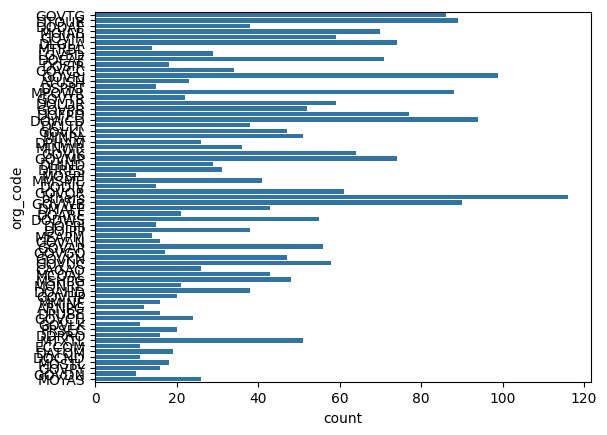

In [ ]:
sns.countplot(data['org_code'])

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_lemma'], data['encoded_labels'], test_size=0.2, random_state=42,stratify=data['encoded_labels'])

# Display the size of the splits
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((2286,), (572,), (2286,), (572,))

In [ ]:
X_train.head()

2292    retire Ch ManagerFin Balram OCP Hingula Area M...
105     Sir Red card North regional level Guide licenc...
2097    SUBJECT HEALTH ISSUES MINERAL water plant ARTO...
1013    ration card number NIRDHANIYA DEVI relate Ram ...
1531    respected mam repeat complaint government offi...
Name: cleaned_lemma, dtype: object

In [ ]:
y_train.value_counts()

33    94
11    82
14    82
1     79
19    77
      ..
56     9
60     9
62     9
65     8
29     8
Name: encoded_labels, Length: 67, dtype: int64

In [ ]:
y_test.value_counts()

33    23
11    21
14    20
1     20
34    19
      ..
29     2
65     2
62     2
56     2
60     2
Name: encoded_labels, Length: 67, dtype: int64

In [ ]:
# Load BERT model and tokenizer via HuggingFace Transformers
bert = AutoModel.from_pretrained('bert-large-uncased')
tokenizer = BertTokenizerFast.from_pretrained('bert-large-uncased')

Text(0, 0.5, 'Number of texts')

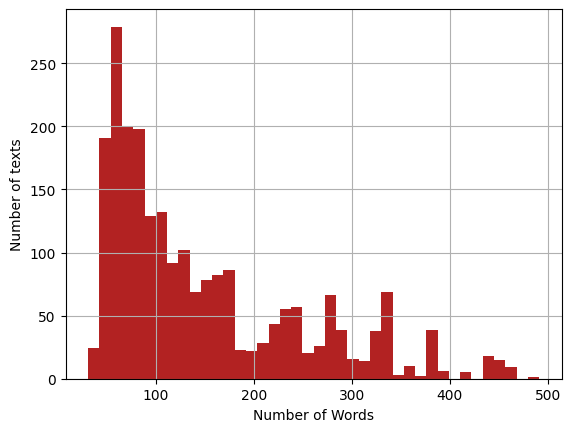

In [ ]:
# Plot histogram of the number of words in train data 'title'
seq_len = [len(title.split()) for title in X_train]

pd.Series(seq_len).hist(bins = 40,color='firebrick')
plt.xlabel('Number of Words')
plt.ylabel('Number of texts')

In [ ]:
# Majority of titles above have word length under 80. So, we set max title length as 80
MAX_LENGHT = 80
# Tokenize and encode sequences in the train set
tokens_train = tokenizer.batch_encode_plus(
    X_train.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)


# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    X_test.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2645: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
# Convert lists to tensors
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(y_train.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(y_test.tolist())

In [ ]:
# Data Loader structure definition
batch_size = 100                                               #define a batch size

train_data = TensorDataset(train_seq, train_mask, train_y)    # wrap tensors
train_sampler = RandomSampler(train_data)                     # sampler for sampling the data during training
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
                                                              # dataLoader for train set
test_data = TensorDataset(test_seq, test_mask, test_y)            # wrap tensors
test_sampler = SequentialSampler(test_data)                     # sampler for sampling the data during training
test_dataloader = DataLoader(test_data, sampler = test_sampler, batch_size=batch_size)
                                                              # dataLoader for validation set

In [ ]:
# Freezing the parameters and defining trainable BERT structure
for param in bert.parameters():
    param.requires_grad = False    # false here means gradient need not be computed}

In [ ]:
class BERT_Arch(nn.Module):
    def __init__(self, bert):
      super(BERT_Arch, self).__init__()
      self.bert = bert
      self.dropout = nn.Dropout(0.1)            # dropout layer
      self.relu =  nn.ReLU()                    # relu activation function
      self.fc1 = nn.Linear(1024,512)             # dense layer 1
      self.fc2 = nn.Linear(512,67)               # dense layer 2 (Output layer)
      self.softmax = nn.LogSoftmax(dim=1)       # softmax activation function
    def forward(self, sent_id, mask):           # define the forward pass
      cls_hs = self.bert(sent_id, attention_mask=mask)['pooler_output']
                                                # pass the inputs to the model
      x = self.fc1(cls_hs)
      x = self.relu(x)
      x = self.dropout(x)
      x = self.fc2(x)                           # output layer
      x = self.softmax(x)                       # apply softmax activation
      return x

model = BERT_Arch(bert)
# Defining the hyperparameters (optimizer, weights of the classes and the epochs)
# Define the optimizer
from transformers import AdamW
optimizer = AdamW(model.parameters(),
                  lr = 1e-5)          # learning rate
# Define the loss function
cross_entropy  = nn.NLLLoss()
# Number of training epochs
epochs = 10

In [ ]:
# Defining training and evaluation functions
def train():
  model.train()
  total_loss, total_accuracy = 0, 0

  for step,batch in enumerate(train_dataloader):                # iterate over batches
    if step % 50 == 0 and not step == 0:                        # progress update after every 100 batches.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))
    batch = [r for r in batch]                                  # push the batch to gpu
    sent_id, mask, labels = batch
    model.zero_grad()                                           # clear previously calculated gradients
    preds = model(sent_id, mask)                                # get model predictions for current batch
    loss = cross_entropy(preds, labels)                         # compute loss between actual & predicted values
    total_loss = total_loss + loss.item()                       # add on to the total loss
    loss.backward()                                             # backward pass to calculate the gradients
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)     # clip gradients to 1.0. It helps in preventing exploding gradient problem
    optimizer.step()                                            # update parameters
    preds=preds.detach().cpu().numpy()                          # model predictions are stored on GPU. So, push it to CPU

  avg_loss = total_loss / len(train_dataloader)                 # compute training loss of the epoch
                                                                # reshape predictions in form of (# samples, # classes)
  return avg_loss                                 # returns the loss and predictions

def evaluate():
  print("\nEvaluating...")
  model.eval()                                    # Deactivate dropout layers
  total_loss, total_accuracy = 0, 0
  for step,batch in enumerate(test_dataloader):    # Iterate over batches
    if step % 50 == 0 and not step == 0:          # Progress update every 100 batches.
                                                  # Calculate elapsed time in minutes.
                                                  # Elapsed = format_time(time.time() - t0)
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(test_dataloader)))
                                                  # Report progress
    batch = [t for t in batch]                    # Push the batch to GPU
    sent_id, mask, labels = batch
    with torch.no_grad():                         # Deactivate autograd
      preds = model(sent_id, mask)                # Model predictions
      loss = cross_entropy(preds,labels)          # Compute the validation loss between actual and predicted values
      total_loss = total_loss + loss.item()
      preds = preds.detach().cpu().numpy()
  avg_loss = total_loss / len(test_dataloader)         # compute the validation loss of the epoch
  return avg_loss

In [ ]:
# Train and predict
best_valid_loss = float('inf')
train_losses=[]                   # empty lists to store training and validation loss of each epoch
valid_losses=[]

for epoch in range(epochs):
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    train_loss = train()                       # train model
    valid_loss = evaluate()                    # evaluate model
    if valid_loss < best_valid_loss:              # save the best model
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'model_other_cat_150.pt')
    train_losses.append(train_loss)               # append training and validation loss
    valid_losses.append(valid_loss)

    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 10

Evaluating...

Training Loss: 4.219
Validation Loss: 4.179

 Epoch 2 / 10


In [ ]:
# load weights of best model
path = 'model_other_cat_150.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

In [ ]:
with torch.no_grad():
  preds = model(test_seq, test_mask)
  preds = preds.detach().cpu().numpy()

preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

In [ ]:
# testing on unseen data
unseen_news_text = ["Honourable Principal Secretary, Department of Panchayati Raj, Government of India, New Delhi.  (Grievance-Dear Sir, After 76 years of independent of India, there is no regular availability of Road, Drinking water, Electricity, Health and Education, Telecommunication cum internet facility in Gambharibhuin village of Sado Gramapanchayat which comes under Tileibani Block in Deogarh District. Which is a very sensitive and unfortunate matter and as it is a undeveloped hill cum inter remote area there is no good communication. So, i request you to take steps to avail Regular Road, Drinking Water facility, Education, Health and Telecommunication cum internet facility and Electricity connect to Gambharibhuin village.)",     # Fake
                    "Application for request plz justice my brother  i am ollraday submitted complint yes bank complint number X-X-X-X-X but not received complint prossing report my hamble request plz help",               # Fake
                    "My name is Suraj yadav and i passed out from this college in 2018. Due to some personal reasons I have to go to Village for future studies after that the COVID Pandamic. I was unable to collect my passing certificate from college. Nowaday I am trying to get my certificate from school the staff says you were too late we have to find out your certificate. Many times I tried to get back my certificate but every time they refuses me with the same reason.   Kindly help me and provide me my certificate.",           # True
                    "Repeat Grievance to the Department of School Education State Government of Tamilnadu    10th Standard 12th standard final year certificate exams are to be first turned to be online test because free computers were given massively or the free computers must have been collected back and to be submitted to the funding authorities     Because it is given only to make Digital Education     Second thing these exams are to be called as Segregating Exam at the relevant stages only and it should be conducted on Objective Mode alone because precise results are needed and based on LSRW Skills these Segregations are not to be made and so the bulk Part 1 and Part 2 combined portions are to be removed and only one part is to be taken and the Questions are to check the mastery level based over the same topic of Critical Comprehension Power because they are to leave with Comprehension Powers in Tamil and English whether they communicate or not     This is once again told that the fund payers are given the fund only for the development and so in addition to this reminding to collect the Scholarships given prior after the employment to the relevant schools for the School Development Otherwise Schools could not be developed and the Scholarship receivers are to pay at least 50 per cent later because then only they be proudly coming to the Schools as Fathers in that City as Globalized Living is 100 per cent sooner and so the Answer Key Appeals and discretionary Score and Camp Evaluation etc all are to be completely removed     And so these exams are only for segregation is to be compulsorily written over title of the exam and there is a difference in funded Computer Schools before and after otherwise these are to be assumed as Denied the Fund and so Written back the fund to the places where you received the fund     This should be placed in addition to removal of entrance exams for colleges as they are only for segregation the same evaluation need not to be done with bulk pages and examined twice"                          # True
                    ]

# tokenize and encode sequences in the test set
MAX_LENGHT = 200
tokens_unseen = tokenizer.batch_encode_plus(
    unseen_news_text,
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

unseen_seq = torch.tensor(tokens_unseen['input_ids'])
unseen_mask = torch.tensor(tokens_unseen['attention_mask'])

with torch.no_grad():
  preds = model(unseen_seq, unseen_mask)
  preds = preds.detach().cpu().numpy()

preds = np.argmax(preds, axis = 1)
preds

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2645: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


array([11, 11, 11, 11])

In [ ]:
 "Repeat Grievance to the Department of School Education State Government of Tamilnadu    10th Standard 12th standard final year certificate exams are to be first turned to be online test because free computers were given massively or the free computers must have been collected back and to be submitted to the funding authorities     Because it is given only to make Digital Education     Second thing these exams are to be called as Segregating Exam at the relevant stages only and it should be conducted on Objective Mode alone because precise results are needed and based on LSRW Skills these Segregations are not to be made and so the bulk Part 1 and Part 2 combined portions are to be removed and only one part is to be taken and the Questions are to check the mastery level based over the same topic of Critical Comprehension Power because they are to leave with Comprehension Powers in Tamil and English whether they communicate or not     This is once again told that the fund payers are given the fund only for the development and so in addition to this reminding to collect the Scholarships given prior after the employment to the relevant schools for the School Development Otherwise Schools could not be developed and the Scholarship receivers are to pay at least 50 per cent later because then only they be proudly coming to the Schools as Fathers in that City as Globalized Living is 100 per cent sooner and so the Answer Key Appeals and discretionary Score and Camp Evaluation etc all are to be completely removed     And so these exams are only for segregation is to be compulsorily written over title of the exam and there is a difference in funded Computer Schools before and after otherwise these are to be assumed as Denied the Fund and so Written back the fund to the places where you received the fund     This should be placed in addition to removal of entrance exams for colleges as they are only for segregation the same evaluation need not to be done with bulk pages and examined twice"                          # True